In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/pookie/Desktop/Mining_Vibration_data/Minedata_3.csv')
df
#there are two values shown for the same direction, which means that two channel mininmate has been used 

,Tran,Vert,Long,MicL,Tran2,Vert2,Long2,MicL2
0,0.127,0.127,0.000,-0.25,0.000,0.0,0.000,0.00
1,0.127,0.127,0.000,0.00,0.000,0.0,0.000,0.00
2,0.127,0.127,0.000,0.00,0.000,0.0,0.127,0.00
3,0.127,0.127,0.000,0.00,0.000,0.0,0.000,-0.25
4,0.127,0.127,0.000,0.00,0.000,0.0,0.000,0.00
...,...,...,...,...,...,...,...,...
3323,0.127,0.127,0.127,0.00,0.000,0.0,0.000,-0.25
3324,0.000,0.127,0.127,-0.25,0.127,0.0,0.000,0.00
3325,0.127,0.127,0.000,0.00,0.000,0.0,0.000,0.00
3326,0.127,0.127,0.000,-0.25,0.000,0.0,0.000,0.00


In [3]:
df['Tran'].value_counts()
df['Tran2'].value_counts()

Tran2
 0.000    1850
-0.127     432
 0.127     393
-0.254     124
 0.254     120
 0.381      56
-0.381      55
 0.508      52
-0.508      41
 0.635      26
-0.635      24
 0.762      23
-0.889      19
-0.762      18
 0.889      17
-1.016      13
 1.016      12
-1.397       8
 1.143       7
-1.270       6
 1.397       6
 1.524       5
-1.778       5
-1.905       5
-1.524       4
-1.651       3
-1.143       2
 1.270       1
 1.651       1
Name: count, dtype: int64

In [4]:
df.shape

(3328, 8)

In [5]:
import numpy as np
import pandas as pd

# Changing the sample rate to the time interval of 1/1024
# Create an array where each element follows the pattern i / 1024 for i = 1 to 3328
column = np.arange(1, 3329) / 1024

# Reshape the column into a 3328-row array with 1 column
time = column.reshape(-1, 1)

# Create a DataFrame with a single column named 'timings'
df_time = pd.DataFrame(time, columns=['time'])
df_time

,time
0,0.000977
1,0.001953
2,0.002930
3,0.003906
4,0.004883
...,...
3323,3.246094
3324,3.247070
3325,3.248047
3326,3.249023


In [6]:
df_new = pd.concat([df,df_time],axis = 'columns')
df_new

,Tran,Vert,Long,MicL,Tran2,Vert2,Long2,MicL2,time
0,0.127,0.127,0.000,-0.25,0.000,0.0,0.000,0.00,0.000977
1,0.127,0.127,0.000,0.00,0.000,0.0,0.000,0.00,0.001953
2,0.127,0.127,0.000,0.00,0.000,0.0,0.127,0.00,0.002930
3,0.127,0.127,0.000,0.00,0.000,0.0,0.000,-0.25,0.003906
4,0.127,0.127,0.000,0.00,0.000,0.0,0.000,0.00,0.004883
...,...,...,...,...,...,...,...,...,...
3323,0.127,0.127,0.127,0.00,0.000,0.0,0.000,-0.25,3.246094
3324,0.000,0.127,0.127,-0.25,0.127,0.0,0.000,0.00,3.247070
3325,0.127,0.127,0.000,0.00,0.000,0.0,0.000,0.00,3.248047
3326,0.127,0.127,0.000,-0.25,0.000,0.0,0.000,0.00,3.249023


In [7]:
from matplotlib import pyplot as plt 

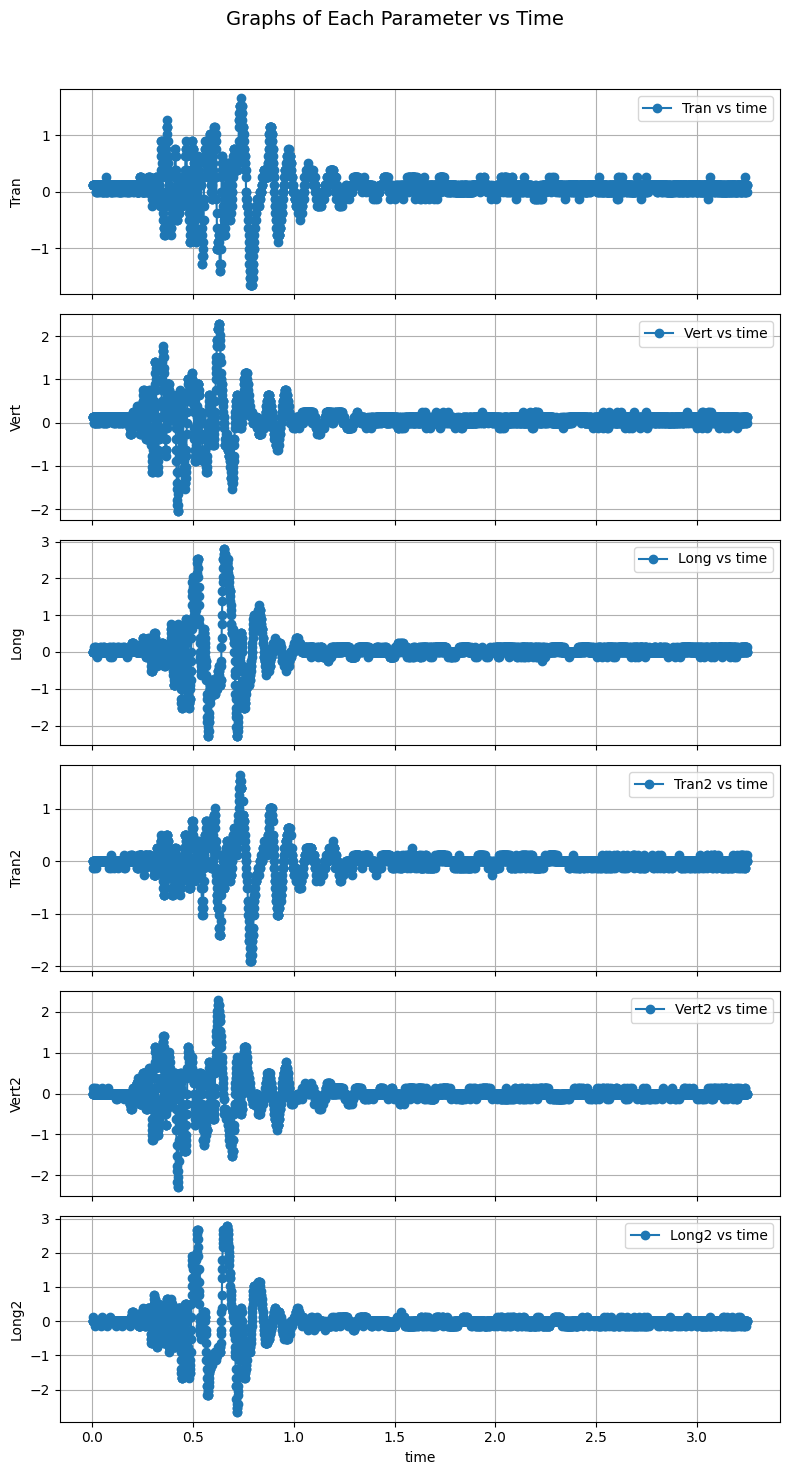

In [8]:
#specifying columns from our dataframe which we will use to plot
columns_to_plot = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(8, 15), sharex=True)
fig.suptitle("Graphs of Each Parameter vs Time", fontsize=14)

for i, column in enumerate(columns_to_plot):
    axes[i].plot(df_new["time"], df_new[column], marker='o', linestyle='-', label=f'{column} vs time')
    axes[i].set_ylabel(column)
    axes[i].grid(True)
    axes[i].legend()
#as all the plots have same x axis so only labeling the last one
axes[-1].set_xlabel("time")

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Performing FFT on velocity in one direction and find frequency corresponding to maximum amplitude**

In [11]:
#performing fft on just Tran
frequencies = np.fft.rfftfreq(3328,d=1/1024)
fft_values = np.fft.rfft(df_new['Tran'])  # FFT on only Tran as of now
amplitudes = 2 / 3328 * np.abs(fft_values)
max_value = np.max(amplitudes)
max_index = max_index = np.argmax(amplitudes)
frequencies[max_index]

np.float64(0.0)

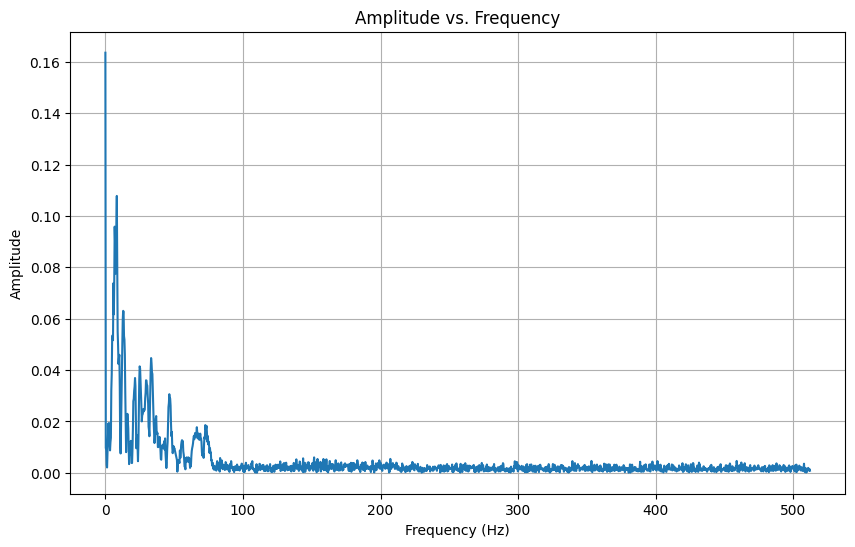

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitudes)

plt.title('Amplitude vs. Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

**Now performing on all the columns which we want to change**

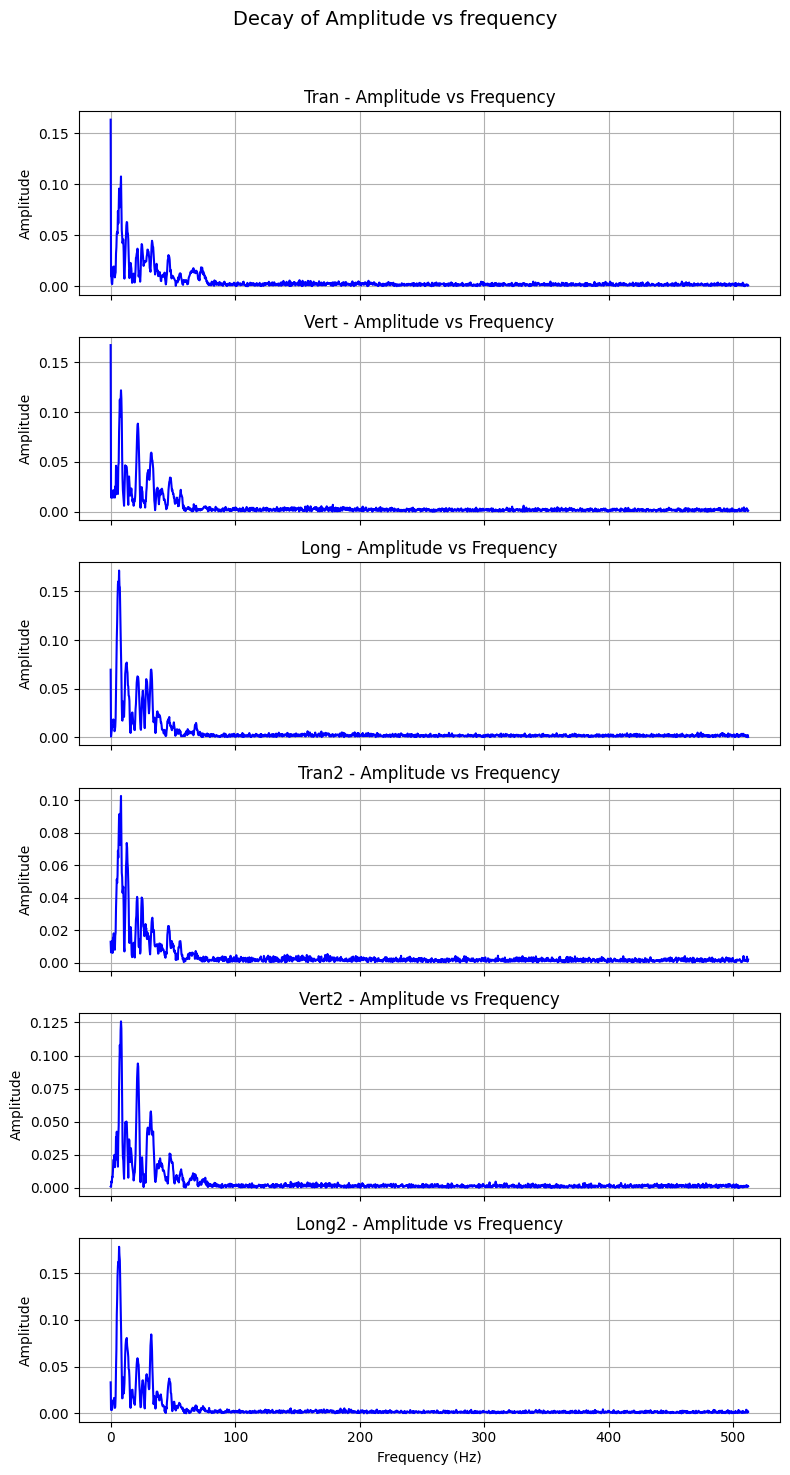

In [13]:
columns_to_check = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]
fig, axes = plt.subplots(len(columns_to_check), 1, figsize=(8, 15), sharex=True)
fig.suptitle("Decay of Amplitude vs frequency", fontsize=14)
for i,column in enumerate(columns_to_check):
    frequencies = np.fft.rfftfreq(3328,d=1/1024) #only the postive ones
    fft_values = np.fft.rfft(df_new[column])  # various columns selected from the list above
    amplitudes = 2 / 3328 * np.abs(fft_values) 
    axes[i].plot(frequencies, amplitudes,color='b')
    axes[i].set_title(f'{column} - Amplitude vs Frequency')
    axes[i].set_ylabel('Amplitude')
    axes[i].grid(True)
axes[-1].set_xlabel('Frequency (Hz)')
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Finding the maximum frequency corresponding to the maximum amplitude**

In [14]:
columns_to_check = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]
for i,column in enumerate(columns_to_check):
    frequencies = np.fft.rfftfreq(3328,d=1/1024) #only the postive ones
    fft_values = np.fft.rfft(df_new[column])  # various columns selected from the list above
    amplitudes = 2 / 3328 * np.abs(fft_values) 
    max_value = np.max(amplitudes)
    max_index = max_index = np.argmax(amplitudes)
    print(f'Amplitudes = {max_value} , Frequency{[i]} = {frequencies[max_index]}')

Amplitudes = 0.16355829326923074 , Frequency[0] = 0.0
Amplitudes = 0.16737439903846157 , Frequency[1] = 0.0
Amplitudes = 0.1715354472386938 , Frequency[2] = 6.76923076923077
Amplitudes = 0.10277132926996091 , Frequency[3] = 8.307692307692308
Amplitudes = 0.12578429785661038 , Frequency[4] = 8.307692307692308
Amplitudes = 0.17806825370121504 , Frequency[5] = 6.76923076923077


In [24]:
columns_to_check = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]
for i,column in enumerate(columns_to_check):
    frequencies = np.fft.rfftfreq(3328,d=1/1024) #only the postive ones
    fft_values = np.fft.rfft(df_new[column])  # various columns selected from the list above
    amplitudes = 2 / 3328 * np.abs(fft_values) 
    max_value = np.max(amplitudes)
    max_index = max_index = np.argmax(amplitudes)
    max_velocity = df_new[column].max()
    print(f'Velocity{[i]} = {max_velocity} , Frequency{[i]} = {frequencies[max_index]}')

Velocity[0] = 1.651 , Frequency[0] = 0.0
Velocity[1] = 2.286 , Frequency[1] = 0.0
Velocity[2] = 2.794 , Frequency[2] = 6.76923076923077
Velocity[3] = 1.651 , Frequency[3] = 8.307692307692308
Velocity[4] = 2.286 , Frequency[4] = 8.307692307692308
Velocity[5] = 2.794 , Frequency[5] = 6.76923076923077


**We will be using these points to plot velocity vs frequency along with DGMS data**

    Velocity  Frequency
0      1.651   0.000000
1      2.286   0.000000
2      2.794   6.769231
3      1.651   8.307692
4      2.286   8.307692
5      2.794   6.769231
6      1.397   0.000000
7      2.159   0.000000
8      2.794  10.153846
9      1.143  11.076923
10     1.778  10.153846
11     3.175  10.153846
12     6.477   8.307692
13    10.670  13.230769
14     9.144  11.692308
15     5.461   7.692308
16     9.017  13.230769
17     8.128  11.692308


In [28]:

data = [
    {"Velocity": 1.651, "Frequency": 0.0},
    {"Velocity": 2.286, "Frequency": 0.0},
    {"Velocity": 2.794, "Frequency": 6.76923076923077},
    {"Velocity": 1.651, "Frequency": 8.307692307692308},
    {"Velocity": 2.286, "Frequency": 8.307692307692308},
    {"Velocity": 2.794, "Frequency": 6.76923076923077},
    {"Velocity": 1.397, "Frequency": 0.0},
    {"Velocity": 2.159, "Frequency": 0.0},
    {"Velocity": 2.794, "Frequency": 10.153846153846155},
    {"Velocity": 1.143, "Frequency": 11.076923076923077},
    {"Velocity": 1.778, "Frequency": 10.153846153846155},
    {"Velocity": 3.175, "Frequency": 10.153846153846155},
    {"Velocity": 6.477, "Frequency": 8.307692307692308},
    {"Velocity": 10.67, "Frequency": 13.230769230769232},
    {"Velocity": 9.144, "Frequency": 11.692307692307693},
    {"Velocity": 5.461, "Frequency": 7.6923076923076925},
    {"Velocity": 9.017, "Frequency": 13.230769230769232},
    {"Velocity": 8.128, "Frequency": 11.692307692307693},
]
df_final = pd.DataFrame(data)
df_final

,Velocity,Frequency
0,1.651,0.000000
1,2.286,0.000000
2,2.794,6.769231
3,1.651,8.307692
4,2.286,8.307692
5,2.794,6.769231
6,1.397,0.000000
7,2.159,0.000000
8,2.794,10.153846
9,1.143,11.076923


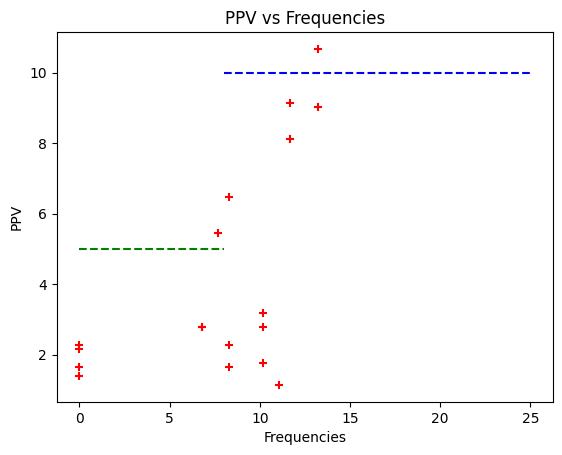

In [39]:
plt.scatter(df_final['Frequency'],df_final['Velocity'],marker = '+',color='r')
plt.xlabel('Frequencies')
plt.ylabel('PPV')
plt.title('PPV vs Frequencies')
plt.hlines(y=5, xmin=0, xmax=8, colors='g', linestyles='--', label='y=5 (0 ≤ Frequency ≤ 8)')
plt.hlines(y=10, xmin=8, xmax=25, colors='b', linestyles='--', label='y=10 (8 ≤ Frequency ≤ 25)')
